In [11]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [12]:
def deriv(y, t, N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1):
    S, E, C, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * epsilon * E - phi * (1 - epsilon) * E
    dCdt = phi * (1 - epsilon) * E - lambda1 * C 
    dIdt = delta * epsilon * E - (1-alpha) * gamma * I - rho * alpha * I
    dRdt =lambda1 * C + (1-alpha) * gamma * I          
    dDdt = rho * alpha * I
    return dSdt, dEdt, dCdt, dIdt, dRdt, dDdt

In [13]:

N = 1352600000
D = 20.0               #infections lasts days
gamma = 1.0 / D
delta = 1/5.1      # incubation period of five days
epsilon = 0.9          # being a symptomatic and (1-epsilon) asymptomatic
R_0 = 5.0
beta = R_0 * gamma     # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.033         # death rate
rho = 1/9             # 30 days from infection until death
phi = 1.0 / 5.0         # 5 days approx carrier period before recovery
lambda1 = 1.0 / 7.0    # 7 days infection period
S0, E0, C0, I0, R0, D0 = N-31-1000-5000000, 5000000, 1000, 31, 0, 0    # initial conditions of 3 march.

In [14]:

t = np.linspace(0, 50, 50)     # Grid of time points (in days)
y0 = S0, E0, C0, I0, R0, D0      # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1))
S, E, C, I, R, D = ret.T
print(D)

[0.00000000e+00 1.55515163e+03 5.79465456e+03 1.22491894e+04
 2.06233835e+04 3.07475868e+04 4.25443470e+04 5.60052482e+04
 7.11750664e+04 8.81411059e+04 1.07026215e+05 1.27984435e+05
 1.51198544e+05 1.76878986e+05 2.05263827e+05 2.36619488e+05
 2.71242094e+05 3.09459299e+05 3.51632532e+05 3.98159589e+05
 4.49477535e+05 5.06065899e+05 5.68450112e+05 6.37205197e+05
 7.12959665e+05 7.96399596e+05 8.88272873e+05 9.89393528e+05
 1.10064613e+06 1.22299018e+06 1.35746437e+06 1.50519065e+06
 1.66737799e+06 1.84532559e+06 2.04042547e+06 2.25416417e+06
 2.48812332e+06 2.74397891e+06 3.02349873e+06 3.32853801e+06
 3.66103263e+06 4.02298972e+06 4.41647530e+06 4.84359864e+06
 5.30649307e+06 5.80729316e+06 6.34810804e+06 6.93099110e+06
 7.55790603e+06 8.23068986e+06]


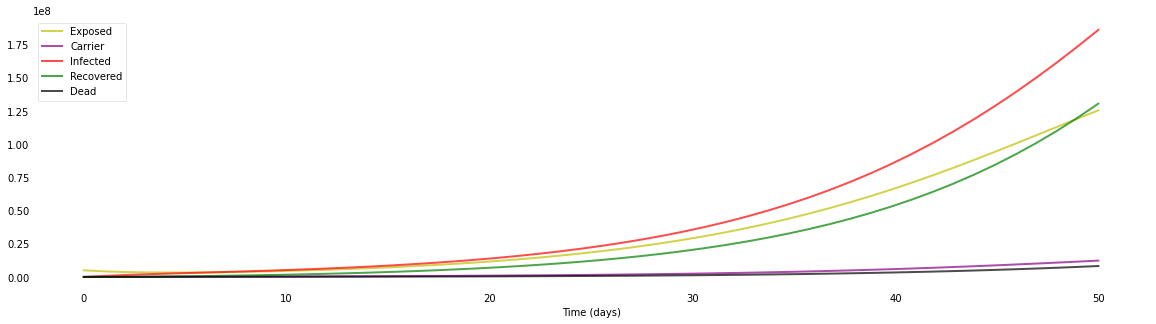

In [15]:
f, ax = plt.subplots(1,1,figsize=(20,5))
# ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(t, C, 'darkmagenta', alpha=0.7, linewidth=2, label='Carrier')
ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
# ax.plot(t, S+E+C+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

ax.set_xlabel('Time (days)')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show();